# FBD: hands-on session 1


damien.challet@epfl.ch

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
import yfinance
ticker_name="AAPL" 

ticker=yfinance.Ticker(ticker_name)

dataT=ticker.history(start="1980-01-01")

logrets=np.log(dataT.Close).diff().dropna()
logrets=logrets[logrets!=0]

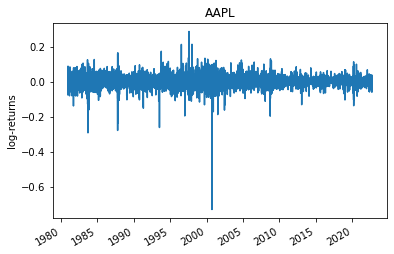

In [3]:
logrets.plot()
plt.xlabel("")
plt.ylabel("log-returns")
plt.title(ticker_name)
plt.savefig("logrets_"+ticker_name+".pdf")

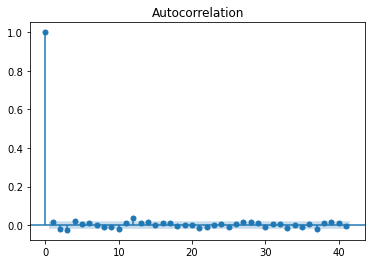

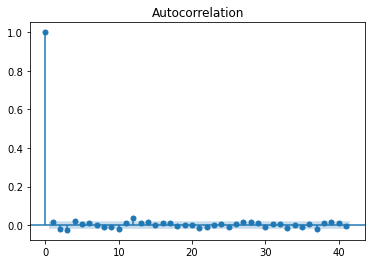

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(logrets)



In [13]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 450.8 kB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
from yahoo_fin import stock_info as si 
import numpy as np 
from statsmodels.distributions.empirical_distribution import ECDF
import fbm

sp500_tickers = np.array(si.tickers_sp500())



def download_daily_data(name):
    import yfinance as yf
    interval = "1d"
    data = yf.download(name, interval = interval)
    data.to_csv(f"data/raw/daily/YF/{name}.csv.gz")
    

In [7]:
download_daily_data("GM")


price = data.Close
logreturn = np.log(price/price.shift(1)).dropna()
plt.plot(logreturn)
plt.show()

rolling_variance = logreturn.rolling(30).var()
plt.plot(rolling_variance)

[*********************100%***********************]  1 of 1 completed


NameError: name 'data' is not defined

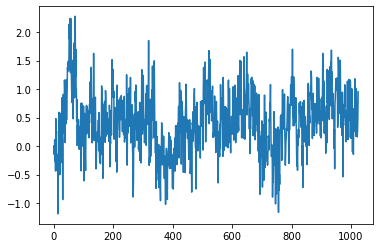

In [36]:
import pandas as pd



In [74]:
import math
import yfinance as yf
import fbm


f = fbm.FBM(10000, 0.1)
serie = pd.Series(f.fbm())


def get_log_mean_squared(serie, t):
        
        diff = serie - serie.shift(t)
        diff = diff.dropna()
        mean_squared = diff.pow(2).mean()
        log_mean_squared = np.log(mean_squared)
        return log_mean_squared

    
def get_H(serie):
    
    t = np.arange(1, 100, 1)
    f = lambda t: get_log_mean_squared(serie, t)
    result = np.array( list(map(f, t)))
    log_t = np.log(t)

    X = np.array([np.ones(len(t)), log_t]).transpose()
    y = np.array(result).reshape(len(result), 1)

    beta = np.linalg.inv((X.transpose() @ X)) @ X.transpose() @ result
    H = beta[1]/2
    a = np.exp(beta[0])
    return a, H


#test this on yang zhang volatility 
#https://portfolioslab.com/tools/yang-zhang

[*********************100%***********************]  1 of 1 completed


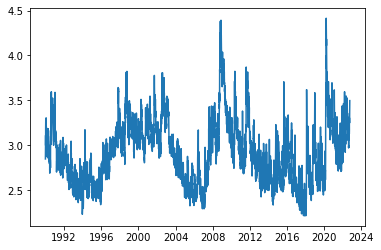

a: 0.006239033769467176, H: 0.3196336256455711


In [73]:
vix = np.log(yf.download("^VIX").Close)
plt.plot(vix)
plt.show()

#plotting vix

a, H = get_H(vix)
print(f"a: {a}, H: {H}")

[*********************100%***********************]  1 of 1 completed


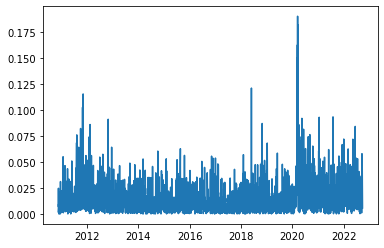

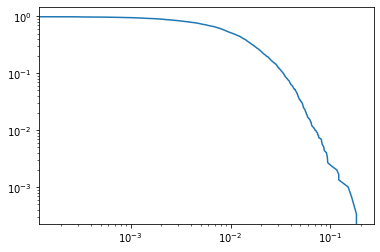

C:\Users\giova\AppData\Local\Temp/ipykernel_2440/3918350521.py:18: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(1-ecdf.y[1:]), logreturn)


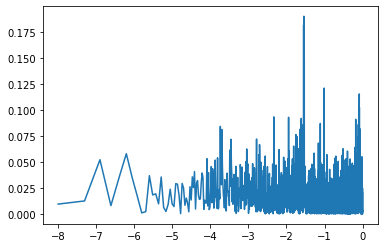

In [79]:
from statsmodels.distributions.empirical_distribution import ECDF

data = yf.download("GM", period = "max")
price = data.Close

logreturn = np.log(price/price.shift(1)).dropna().abs()
plt.plot(logreturn)
plt.show()


#ecdf calculation 
ecdf = ECDF(logreturn)
plt.yscale("log")
plt.xscale("log")
plt.plot(ecdf.x, 1 - ecdf.y)
plt.show()

plt.plot(np.log(1-ecdf.y[1:]), logreturn)
plt.show()